In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("датасет_new.csv")

In [3]:
data_dct = pd.read_csv("словарь_соцдема.csv")

In [4]:
data_dct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180341 entries, 0 to 180340
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   number    180341 non-null  int64  
 1   age_back  178805 non-null  float64
 2   gender    178407 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 4.1+ MB


In [5]:
data_dct.sample(5)

,number,age_back,gender
155165,155166,32.0,М
151977,151980,41.0,Ж
88924,88925,38.0,Ж
124421,124362,52.0,Ж
145288,145289,36.0,М


In [6]:
data_dct.gender.value_counts()

gender
Ж    98194
М    80213
Name: count, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269242 entries, 0 to 6269241
Data columns (total 10 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   Дата и время события              object
 1   Экран                             object
 2   Функционал                        object
 3   Действие                          object
 4   Идентификатор устройства          int64 
 5   Номер сессии в рамках устройства  int64 
 6   Производитель устройства          object
 7   Модель устройства                 object
 8   Тип устройства                    object
 9   ОС                                object
dtypes: int64(2), object(8)
memory usage: 478.3+ MB


In [8]:
col = "Дата и время события"
data[col] = data[col].str.replace(r"\[.*\]$", "", regex=True)
data[col] = pd.to_datetime(data[col], format="mixed", utc=True)
data[col] = data[col].dt.tz_convert("Europe/Moscow")
data[col] = data[col].dt.tz_localize(None)

In [9]:
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(6269242, 10)
(3360650, 10)


In [10]:
data.head()

,Дата и время события,Экран,Функционал,Действие,Идентификатор устройства,Номер сессии в рамках устройства,Производитель устройства,Модель устройства,Тип устройства,ОС
0,2025-09-29 10:20:27,Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android
2,2025-09-29 10:21:56,Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android
4,2025-09-29 10:22:01,Еще,Переход в раздел 'Заявки',Тап на кнопку 'Заявки',339,10000000009,Redmi,Redmi Note 12,phone,Android
6,2025-09-29 10:23:49,Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android
8,2025-09-29 10:20:17,Новая заявка,Выбор квартиры,Тап на квартиру,339,10000000009,Redmi,Redmi Note 12,phone,Android


In [11]:
data = data.merge(data_dct, how='left', left_on = 'Идентификатор устройства', right_on = 'number').drop('number', axis = 1)

In [12]:
data[['Экран', 'Функционал',	'Действие']] = data[['Экран', 'Функционал',	'Действие']].apply(lambda x: x.str.lower())
data[['Экран', 'Функционал',	'Действие']] = data[['Экран', 'Функционал',	'Действие']].apply(lambda x: x.str.strip())

In [13]:
data.isna().sum()

Дата и время события                      0
Экран                                     0
Функционал                                0
Действие                            1765376
Идентификатор устройства                  0
Номер сессии в рамках устройства          0
Производитель устройства                  0
Модель устройства                         0
Тип устройства                            0
ОС                                        0
age_back                              17107
gender                                21520
dtype: int64

In [14]:
print(f'Минимальное время : {data["Дата и время события"].min()}')
print(f'Максимальное время : {data["Дата и время события"].max()}')
print(f'Количество уникальных устройств : {len(data["Идентификатор устройства"].unique())}')

Минимальное время : 2025-09-01 00:00:05
Максимальное время : 2025-10-31 23:59:54
Количество уникальных устройств : 179976


In [15]:
display(data['Экран'].value_counts()[:5])
print(f'Уникальное количество экранов {len(data["Экран"].unique())}')

Экран
еще             1733831
новая заявка     837026
заявки           313188
важное           234474
мой дом           78784
Name: count, dtype: int64

Уникальное количество экранов 13


In [16]:
display(data['Функционал'].value_counts()[:5])
print(f'Уникальное количество функциональности: {len(data["Функционал"].unique())}')

Функционал
открытие экрана               1759123
просмотр уведомления           234474
переход в раздел 'заявки'      200179
возврат на предыдущий этап     141793
выбор через теги               137334
Name: count, dtype: int64

Уникальное количество функциональности: 158


In [17]:
display(data['Действие'].value_counts()[:5])
print(f'Количество пустых значений: {data["Действие"].isna().sum()}')
print(f'Уникальное количество действий: {len(data["Действие"].unique())}')

Действие
тап на уведомление                                 234474
тап на кнопку 'заявки'                             200179
тап на стрелку назад                               141793
тап на кнопку 'опросы и собрания собственников'    126429
тап на заявку                                       87227
Name: count, dtype: int64

Количество пустых значений: 1765376
Уникальное количество действий: 314


## Анализ на Nan

### Проверим гипотезу, что большая часть Nan действий связано с функционалом "Открытие экрана"


In [83]:
print(f'{round(len(data[(data["Функционал"] == "Открытие экрана") & (data["Действие"].isna())])/data["Действие"].isna().sum()* 100,2)}%')

0.0%


### Гипотеза подтвердилась, взгляенем на остальные 1.7%

In [84]:
data[-(data['Функционал'] == 'Открытие экрана') & (data['Действие'].isna())].sample(3)

,Дата и время события,Экран,Функционал,Действие,Идентификатор устройства,Номер сессии в рамках устройства,Производитель устройства,Модель устройства,Тип устройства,ОС,age_back,gender
35512,2025-10-09 18:05:06,еще,открытие экрана,NaN,849,10000000081,Apple,iPhone 13 Mini,phone,iOS,57.0,М
557704,2025-10-21 12:00:20,мой дом,открытие экрана,NaN,82571,10000000001,Redmi,Redmi 12,phone,Android,78.0,М
589789,2025-09-10 00:15:01,новая заявка,открытие экрана,NaN,4960,10000000481,Xiaomi,Xiaomi 11 Lite 5G NE,phone,Android,35.0,Ж


In [85]:
print(f"{round(len(data[(data['Функционал'] == 'Выбор через теги') & (data['Действие'].isna())])/data['Действие'].isna().sum()* 100,2)}%")

0.0%


In [86]:
data[(data['Функционал'] == 'Выбор через теги') & (data['Действие'].isna())]['Экран'].unique()

array([], dtype=object)

In [87]:
data[(data['Функционал'] == 'Выбор через теги')]['Экран'].value_counts()

Series([], Name: count, dtype: int64)

In [88]:
data[(data['Функционал'] == 'Открытие экрана') & -(data['Действие'].isna())]['Экран'].value_counts()

Series([], Name: count, dtype: int64)

In [89]:
data[(data['Функционал'] == 'Открытие экрана')]['Экран'].value_counts()

Series([], Name: count, dtype: int64)

In [90]:
data[(data['Функционал'] == 'Открытие экрана') & (data['Действие'].isna())]['Экран'].value_counts()

Series([], Name: count, dtype: int64)

In [91]:
data[(data['Функционал'] == 'Открытие экрана') & (data['Экран'] ==  'Еще')]['Действие'].value_counts()

Series([], Name: count, dtype: int64)

### Теперь возраст и пол

In [92]:
print(f"Количество не указавших возраст: {round(len(data[data['age_back'].isna()]['Идентификатор устройства'].unique()))}")
print(f"Количество не указавших пол: {round(len(data[data['gender'].isna()]['Идентификатор устройства'].unique()))}")
print(f"Проверим одни и те же это люди: {round(len(data[(data['gender'].isna()) & (data['age_back'].isna())]['Идентификатор устройства'].unique()))}")


Количество не указавших возраст: 1171
Количество не указавших пол: 1569
Проверим одни и те же это люди: 1171


 ### Анализ на Nan показал,
Функционал 'открытие экрана' приводит либо к Nan(98.3%), либо к действию 'открытию экрана' через экраны "услуги", 'объявления', 'мои балы'

Функционал 'выбор через теги' вместе в экраном 'новая заявка' приводит к оставшимся Nan(1.7%), либо к действиям  'выбор тега 1','выбор тега 1', 'выбор темы через теги'

Выявить закономерность в Nan возраста и пола не удалось, но 66% людей, не указывающих свой пол, не указывают возраст

## Посмотрим на графики и поищем инсайды

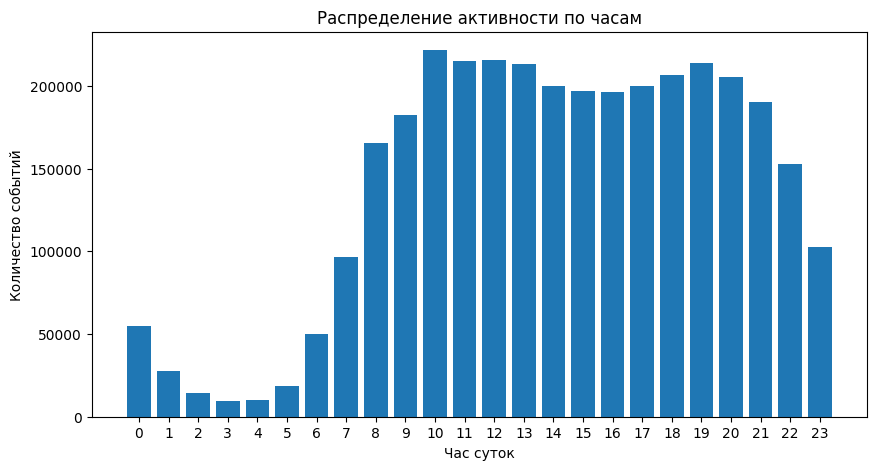

In [93]:
data["hour"] = data[col].dt.hour
hour_counts = data.groupby("hour").size().reset_index(name="count")
hour_counts = hour_counts.sort_values("hour")
plt.figure(figsize=(10, 5))
plt.bar(hour_counts["hour"], hour_counts["count"])
plt.xticks(range(0, 24))
plt.xlabel("Час суток")
plt.ylabel("Количество событий")
plt.title("Распределение активности по часам")
plt.show()

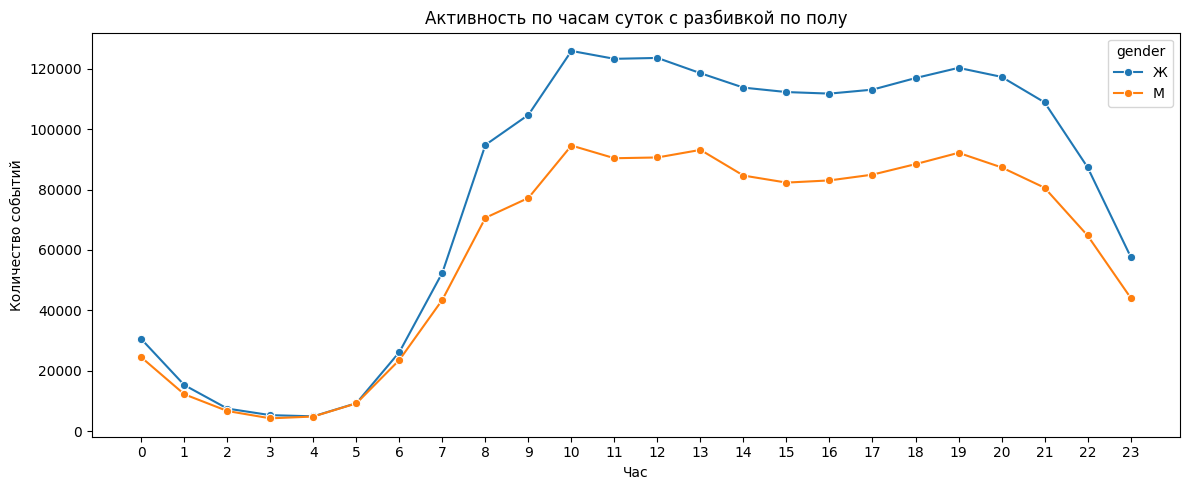

In [94]:
data["hour"] = data["Дата и время события"].dt.hour

hour_gender = (data
    .groupby(["hour", "gender"])
    .size()
    .reset_index(name="count"))

plt.figure(figsize=(12, 5))
sns.lineplot(data=hour_gender, x="hour", y="count", hue="gender", marker="o")
plt.xticks(range(0, 24))
plt.title("Активность по часам суток с разбивкой по полу")
plt.xlabel("Час")
plt.ylabel("Количество событий")
plt.tight_layout()


C:\Users\Марат\AppData\Local\Temp\ipykernel_4488\3124021105.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["hour", "age_group"])


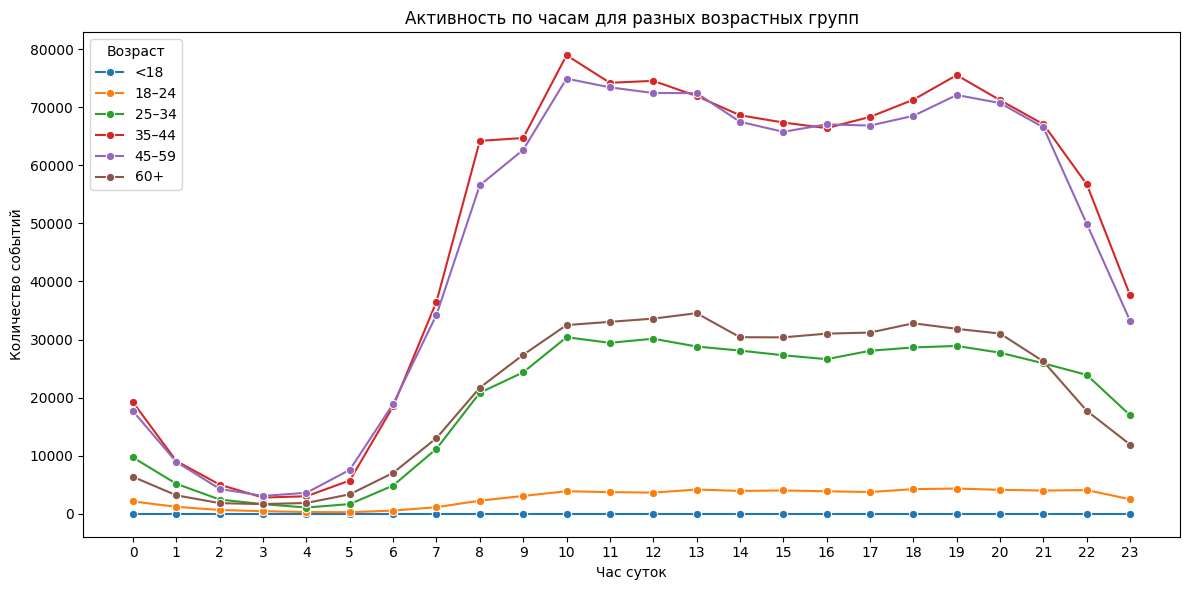

In [95]:
bins = [0, 18, 25, 35, 45, 60, 120]
labels = ["<18", "18–24", "25–34", "35–44", "45–59", "60+"]
data["age_group"] = pd.cut(data["age_back"], bins=bins, labels=labels, right=False)


hour_age = (data
            .groupby(["hour", "age_group"])
            .size()
            .reset_index(name="count"))

plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_age, x="hour", y="count", hue="age_group", marker="o")
plt.xticks(range(0, 24))
plt.xlabel("Час суток")
plt.ylabel("Количество событий")
plt.title("Активность по часам для разных возрастных групп")
plt.legend(title="Возраст")
plt.tight_layout()
plt.show()

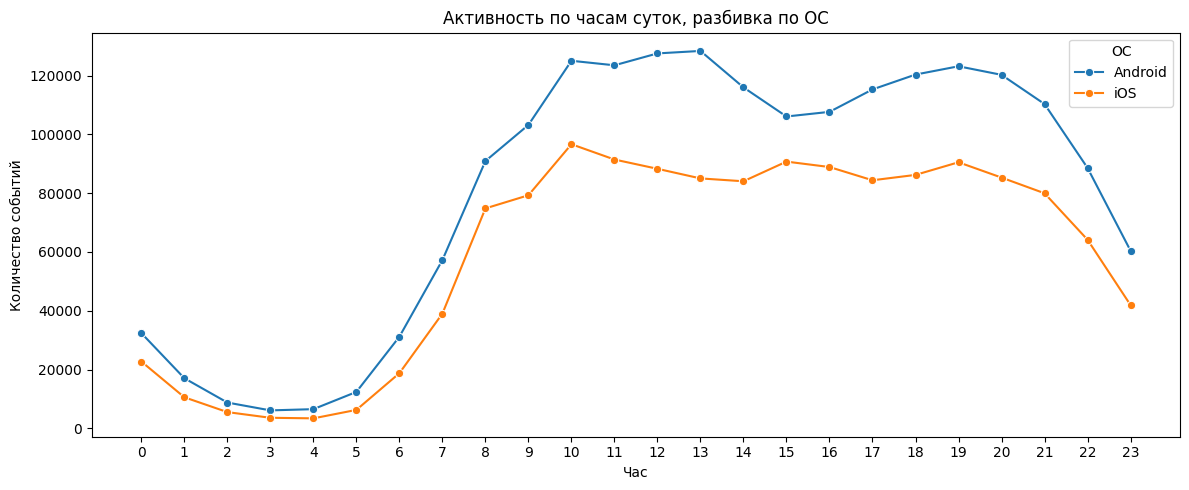

In [96]:
hour_os = (data
    .groupby(["hour", "ОС"])
    .size()
    .reset_index(name="count"))

plt.figure(figsize=(12, 5))
sns.lineplot(data=hour_os, x="hour", y="count", hue="ОС", marker="o")
plt.xticks(range(0, 24))
plt.title("Активность по часам суток, разбивка по ОС")
plt.xlabel("Час")
plt.ylabel("Количество событий")
plt.tight_layout()

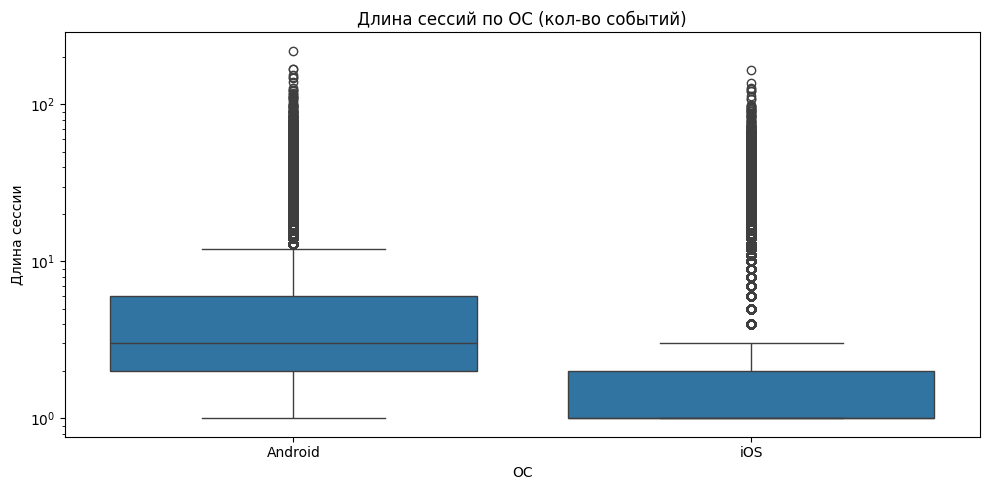

In [97]:
session_sizes = (data
    .groupby(["Идентификатор устройства", "Номер сессии в рамках устройства", "ОС"])
    .size()
    .reset_index(name="session_len"))

plt.figure(figsize=(10, 5))
sns.boxplot(data=session_sizes, x="ОС", y="session_len")
plt.yscale("log")  # если хвосты большие
plt.title("Длина сессий по ОС (кол-во событий)")
plt.xlabel("ОС")
plt.ylabel("Длина сессии")
plt.tight_layout()

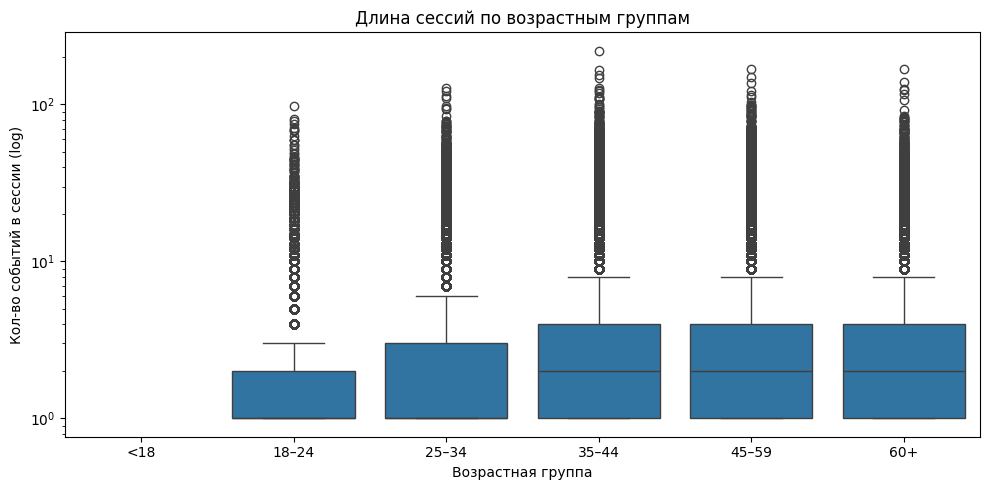

In [98]:
session_sizes = (data
    .groupby(["Идентификатор устройства", "Номер сессии в рамках устройства", "age_back"])
    .size()
    .reset_index(name="session_len"))
session_sizes["age_group"] = pd.cut(session_sizes["age_back"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 5))
sns.boxplot(data=session_sizes, x="age_group", y="session_len")
plt.yscale("log")
plt.title("Длина сессий по возрастным группам")
plt.xlabel("Возрастная группа")
plt.ylabel("Кол-во событий в сессии (log)")
plt.tight_layout()

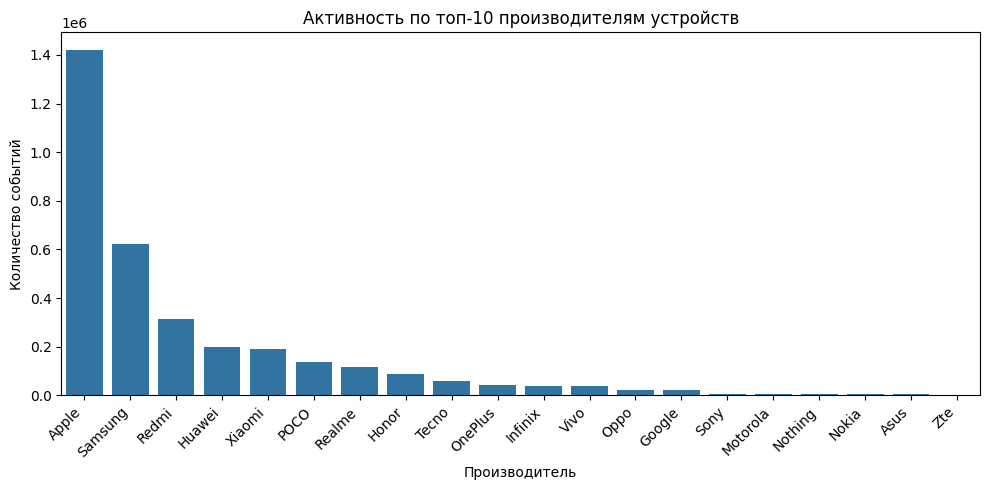

In [99]:
top_vendors = (data["Производитель устройства"]
               .value_counts()
               .head(20)
               .index)

plt.figure(figsize=(10, 5))
sns.countplot(
    data=data[data["Производитель устройства"].isin(top_vendors)],
    x="Производитель устройства",
    order=top_vendors
)
plt.title("Активность по топ‑10 производителям устройств")
plt.xlabel("Производитель")
plt.ylabel("Количество событий")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

C:\Users\Марат\AppData\Local\Temp\ipykernel_4488\173935579.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_models, x="sessions", y="Модель устройства", palette="mako")


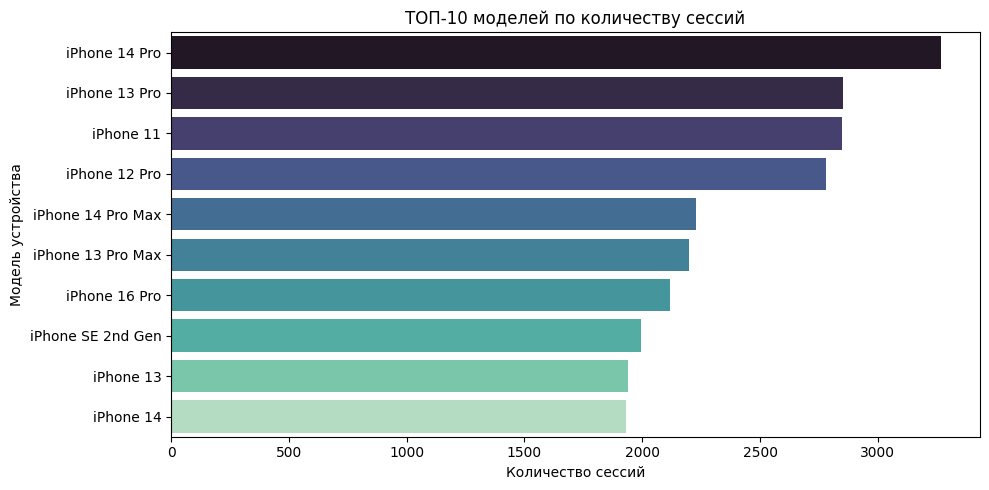

In [100]:
sessions_per_model = (data
    .groupby(["Модель устройства"])
    [["Идентификатор устройства", "Номер сессии в рамках устройства"]]
    .nunique()
    .reset_index())
sessions_per_model["sessions"] = sessions_per_model["Номер сессии в рамках устройства"]

top_models = sessions_per_model.nlargest(10, "sessions")

plt.figure(figsize=(10, 5))
sns.barplot(data=top_models, x="sessions", y="Модель устройства", palette="mako")
plt.title("ТОП‑10 моделей по количеству сессий")
plt.xlabel("Количество сессий")
plt.ylabel("Модель устройства")
plt.tight_layout()

C:\Users\Марат\AppData\Local\Temp\ipykernel_4488\3201439844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["age_group"] = pd.cut(data1["age_back"], bins=bins, labels=labels, right=False)
C:\Users\Марат\AppData\Local\Temp\ipykernel_4488\3201439844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["age_group"] = pd.cut(data1["age_back"], bins=bins, labels=labels, right=False)
C:\Users\Марат\AppData\Local\Temp\ipykernel_4488\3201439844.py:8: FutureWarning: The default of observed=False is de

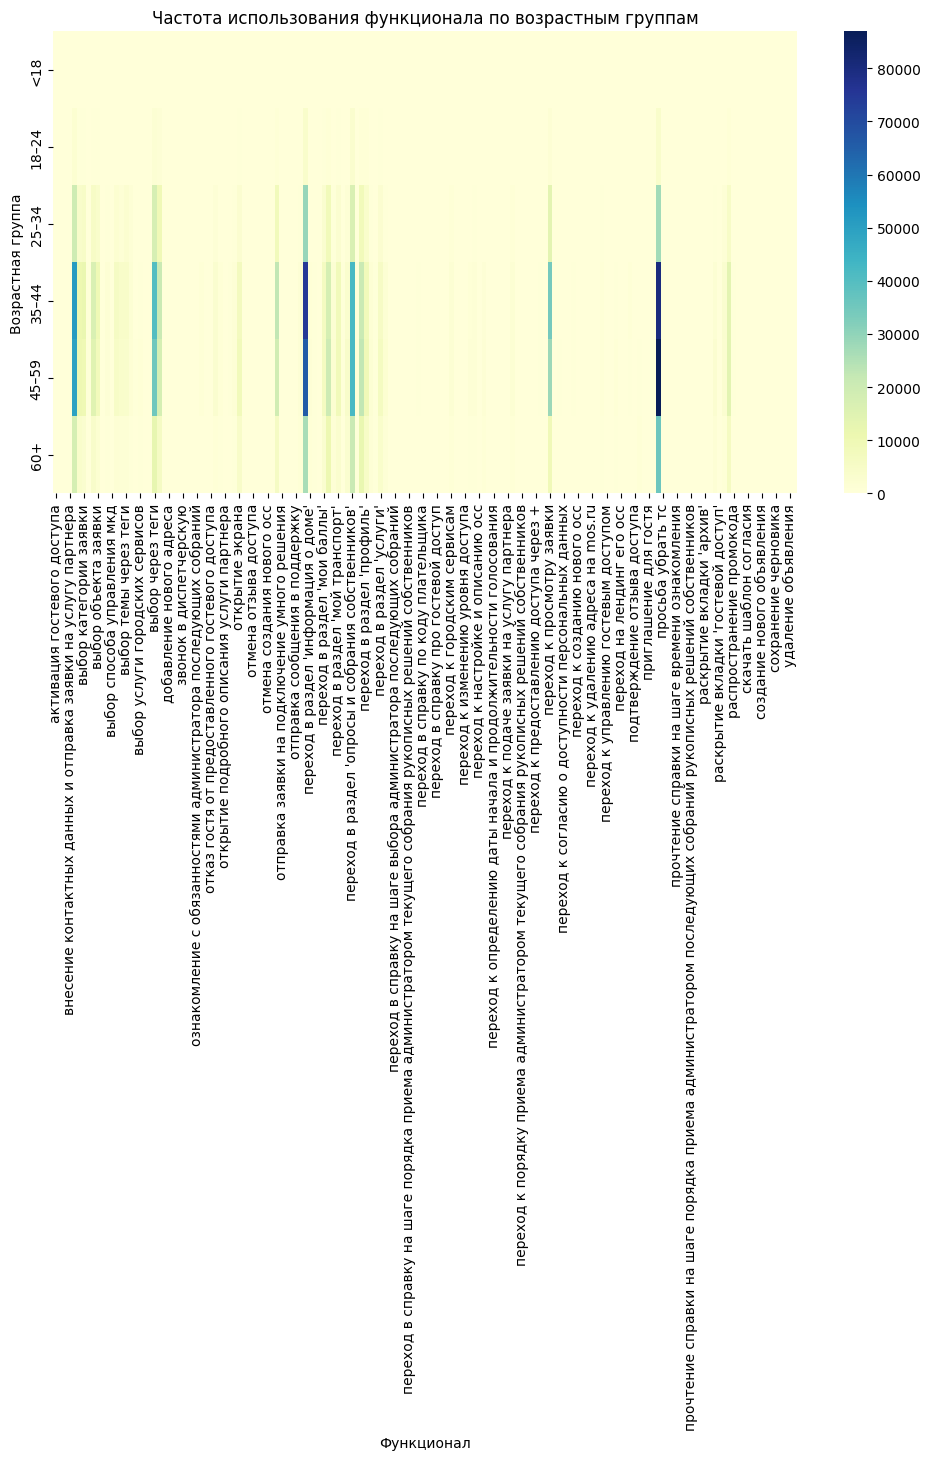

In [101]:
data1 = data[-(data['Функционал'] == 'Открытие экрана') & -(data['Действие'].isna())]
data1["age_group"] = pd.cut(data1["age_back"], bins=bins, labels=labels, right=False)


data1["age_group"] = pd.cut(data1["age_back"], bins=bins, labels=labels, right=False)

pivot = (data1
         .groupby(["age_group", "Функционал"])
         .size()
         .reset_index(name="count"))

table = pivot.pivot(index="age_group", columns="Функционал", values="count").fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(table, cmap="YlGnBu")
plt.title("Частота использования функционала по возрастным группам")
plt.xlabel("Функционал")
plt.ylabel("Возрастная группа")
plt.tight_layout()
plt.show()

In [102]:
table.sum(axis=0).sort_values(ascending=True)[:10]

Функционал
внесение контактных данных и отправка заявки на услугу партнера                                                   0
переход в справку на шаге порядка приема администратором последующих собраний рукописных решений собственников    0
переход в справку на шаге порядка приема администратором текущего собрания рукописных решений собственников       0
прочтение инструкции об обязанностях администратора последующих собраний                                          0
прочтение справки на шаге порядка приема администратором последующих собраний рукописных решений собственников    0
прочтение справки на шаге порядка приема администратором текущего собрания рукописных решений собственников       0
переход в справку на шаге детализации вопросов осс                                                                1
переход в справку на шаге выбора администратора последующих собраний                                              1
прочтение справки на шаге выбора администратора последующих с

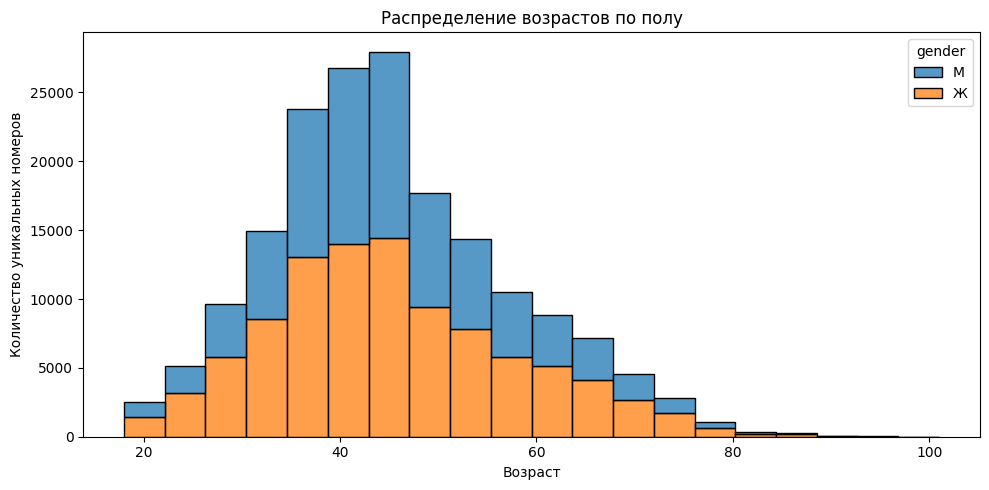

In [103]:
plt.figure(figsize=(10, 5))
sns.histplot(
    data=data_dct,
    x="age_back",
    hue="gender",
    multiple="stack",
    bins=20
)
plt.title("Распределение возрастов по полу")
plt.xlabel("Возраст")
plt.ylabel("Количество уникальных номеров")
plt.tight_layout()

C:\Users\Марат\AppData\Local\Temp\ipykernel_4488\2061989240.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["age_group", "Производитель устройства"])


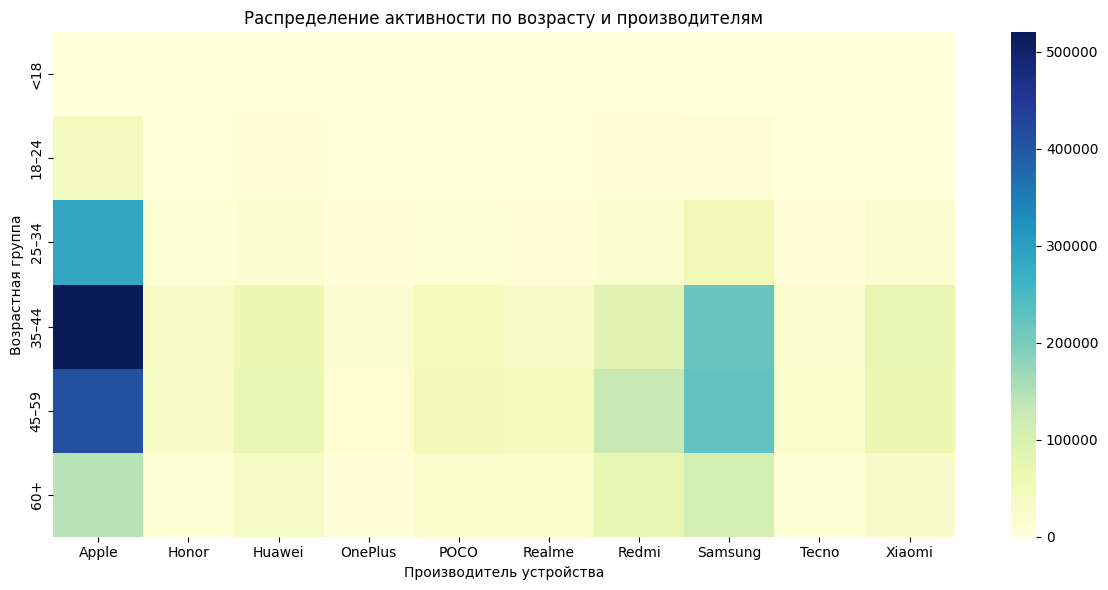

In [104]:
top_vendors = (data["Производитель устройства"]
               .value_counts()
               .head(10)
               .index)
df_v = data[data["Производитель устройства"].isin(top_vendors)]

pivot = (df_v
         .groupby(["age_group", "Производитель устройства"])
         .size()
         .reset_index(name="count"))

table = pivot.pivot(index="age_group",
                    columns="Производитель устройства",
                    values="count").fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(table, cmap="YlGnBu")
plt.title("Распределение активности по возрасту и производителям")
plt.xlabel("Производитель устройства")
plt.ylabel("Возрастная группа")
plt.tight_layout()
plt.show()

Инсайды:
1) Портрет наиболее частого пользователя - Мужчина в возрасте 34-50 лет использующий айфон

2) Чем старше человек, тем больше событий у него происходит в сессии

3) Пик активности приходится на утренние часы

4) Не пользуются популярностью:
 - внесение контактных данных и отправка заявки на услугу партнера
 - переход в справку на шаге порядка приема администратором последующих собраний рукописных решений собственников
 - переход в справку на шаге порядка приема администратором текущего собрания рукописных решений собственников
 - прочтение инструкции об обязанностях администратора последующих собраний
 - прочтение справки на шаге порядка приема администратором последующих собраний рукописных решений собственников
 - прочтение справки на шаге порядка приема администратором текущего собрания рукописных решений собственников

## Переходим к идеям и подготовке даннвх для определние типа пользователя:

Как вариант можно попробовать использовать алгоритм кластеризации(мой фаворит - DBSCAN), удалить NAN в действиях, вынести топ 10-20 популярных функционалов, 10-50 активных действий по каждому пользователю, среднее количество действий в день, количество действий за 2 месяца, производителя(если несколько - берем последнюю), и фичу под время. К примеру наиблее частое время отправки заявки(разедлить на 4 времени суток). К производителям я бы прикрепил onehot c объединением категорий меньше 5000 устройств. К возрасту - на бины и кодировкой по возрастанию.

Можно пройтись двумя методами к оставшимя.
Первый - использовать простое onehot запихнув не очень популярные категории в общий фолд, но матрица будет очень разряжена(надо будет указывать для каждого фолда отдельную ячейку).

Второй - использовать берт для эмбедингов для Функционала и Действия. Выбрать топ под каждого человека, и отдельно по функционалу и действию произвести meanpooling и накинуть PCA для уменьшения измерений до +- 40 по каждому

In [18]:
dop_data = data.dropna(subset=['Действие'])

In [19]:
data.head()

,Дата и время события,Экран,Функционал,Действие,Идентификатор устройства,Номер сессии в рамках устройства,Производитель устройства,Модель устройства,Тип устройства,ОС,age_back,gender
0,2025-09-29 10:20:27,еще,открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж
1,2025-09-29 10:21:56,еще,открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж
2,2025-09-29 10:22:01,еще,переход в раздел 'заявки',тап на кнопку 'заявки',339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж
3,2025-09-29 10:23:49,еще,открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж
4,2025-09-29 10:20:17,новая заявка,выбор квартиры,тап на квартиру,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж


In [20]:
data['Дата и время события'] = pd.to_datetime(data['Дата и время события'])

ref_date = data['Дата и время события'].max()

last_activity = (
    data.groupby('Идентификатор устройства')['Дата и время события']
      .max()
      .reset_index()
      .rename(columns={'Дата и время события': 'last_event_time'})
)

last_activity['days_since_last'] = (ref_date - last_activity['last_event_time']).dt.days
last_activity['churn'] = (last_activity['days_since_last'] >= 30).astype(int)

churn_devices = last_activity.query("churn == 1")['Идентификатор устройства'].unique()

In [21]:
last_activity

,Идентификатор устройства,last_event_time,days_since_last,churn
0,1,2025-10-30 21:50:59,1,0
1,2,2025-10-20 11:47:36,11,0
2,3,2025-10-20 13:34:50,11,0
3,4,2025-10-26 00:28:28,5,0
4,5,2025-10-23 05:52:28,8,0
...,...,...,...,...
179971,180337,2025-10-09 11:43:27,22,0
179972,180338,2025-10-09 10:55:17,22,0
179973,180339,2025-10-09 21:00:49,22,0
179974,180340,2025-10-09 19:03:24,22,0


In [22]:
last_activity['churn'].sum()

np.int64(62568)

In [23]:
df = dop_data.copy()

df['Дата и время события'] = pd.to_datetime(df['Дата и время события'])
df['hour'] = df['Дата и время события'].dt.hour

def part_of_day(h):
    if 6 <= h < 12:
        return 'утро'
    elif 12 <= h < 18:
        return 'день'
    elif 18 <= h < 24:
        return 'вечер'
    else:
        return 'ночь'

df['part_of_day'] = df['hour'].apply(part_of_day)

In [24]:
g = df.groupby('Идентификатор устройства')

agg = g.agg(
    last_age=('age_back', 'last'),
    last_gender=('gender', 'last'),
    actions_total=('Дата и время события', 'count'),
    first_dt=('Дата и время события', 'min'),
    last_dt=('Дата и время события', 'max'),
    last_manufacturer=('Производитель устройства', 'last'),
)

days = (agg['last_dt'] - agg['first_dt']).dt.days.clip(lower=1)
agg['actions_per_day'] = agg['actions_total'] / days

In [25]:
part_share = (
    df.groupby(['Идентификатор устройства', 'part_of_day'])
      .size()
      .unstack(fill_value=0)
)

part_share = part_share.div(part_share.sum(axis=1), axis=0)
dominant_part = part_share.idxmax(axis=1).rename('main_part_of_day')
final_df = agg.join(dominant_part)

In [26]:
def part_of_day_e(x):
  if x == 'утро':
    return 1
  if x == 'день':
    return 2
  if x == 'вечер':
    return 3
  if x == 'ночь':
    return 4

bins = [0, 18, 25, 35, 45, 60, np.inf]
labels = [1, 2, 3, 4, 5, 6]

final_df = final_df.drop(['first_dt', 'last_dt'], axis = 1)

In [27]:
age_mean = final_df['last_age'].mean()
gender_mode = final_df['last_gender'].mode()[0]

In [28]:

final_df['last_age'] = pd.cut(final_df['last_age'].fillna(age_mean), bins=bins, labels=labels, right=False).astype(int)
final_df['last_gender'] = final_df['last_gender'].fillna(gender_mode).apply(lambda x: 0 if x == 'Ж' else 1)
final_df['main_part_of_day'] = final_df['main_part_of_day'].apply(lambda x: part_of_day_e(x))

In [29]:
final_df

,last_age,last_gender,actions_total,last_manufacturer,actions_per_day,main_part_of_day
Идентификатор устройства,,,,,,
1,4,0,114,Samsung,1.932203,2
2,5,0,69,Samsung,2.300000,1
3,5,1,10,Tecno,0.909091,2
4,4,1,33,Samsung,1.571429,3
5,4,0,1,Redmi,1.000000,2
...,...,...,...,...,...,...
180334,5,0,13,Apple,13.000000,3
180336,4,1,2,Oppo,2.000000,2
180337,4,1,1,Huawei,1.000000,1


In [117]:
churn_devices

array([   196,    199,    200, ..., 180286, 180287, 180288],
      shape=(62568,))

In [31]:
final_df = final_df.merge(last_activity[['Идентификатор устройства', 'churn']], how = 'left', on = 'Идентификатор устройства')

In [30]:
vc = final_df['last_manufacturer'].value_counts()
final_df['last_manufacturer'] = final_df['last_manufacturer'].where(
    final_df['last_manufacturer'].isin(vc[vc >= 5000].index),
    'Другие'
)

Снизу словари по ключу уникальногоу стройства по действиям и функционалам, осталось что то сделать с ними + OHE производителя утсройства

In [120]:
top_actions = (
    dop_data.groupby('Идентификатор устройства')['Действие']
        .apply(lambda s: s.value_counts().head(50).index.tolist())
        .to_dict()
)

In [121]:
top_funcs = (
    dop_data.groupby('Идентификатор устройства')['Функционал']
        .apply(lambda s: s.value_counts().head(30).index.tolist())
        .to_dict()
)

In [122]:
final_df

,Идентификатор устройства,last_age,last_gender,actions_total,last_manufacturer,actions_per_day,main_part_of_day,churn
0,1,4,0,114,Samsung,1.932203,2,0
1,2,5,0,69,Samsung,2.300000,1,0
2,3,5,1,10,Другие,0.909091,2,0
3,4,4,1,33,Samsung,1.571429,3,0
4,5,4,0,1,Redmi,1.000000,2,0
...,...,...,...,...,...,...,...,...
142242,180334,5,0,13,Apple,13.000000,3,0
142243,180336,4,1,2,Другие,2.000000,2,0
142244,180337,4,1,1,Huawei,1.000000,1,0
142245,180340,5,1,6,Samsung,6.000000,3,0


In [123]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142247 entries, 0 to 142246
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Идентификатор устройства  142247 non-null  int64  
 1   last_age                  142247 non-null  int64  
 2   last_gender               142247 non-null  int64  
 3   actions_total             142247 non-null  int64  
 4   last_manufacturer         142247 non-null  object 
 5   actions_per_day           142247 non-null  float64
 6   main_part_of_day          142247 non-null  int64  
 7   churn                     142247 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 8.7+ MB


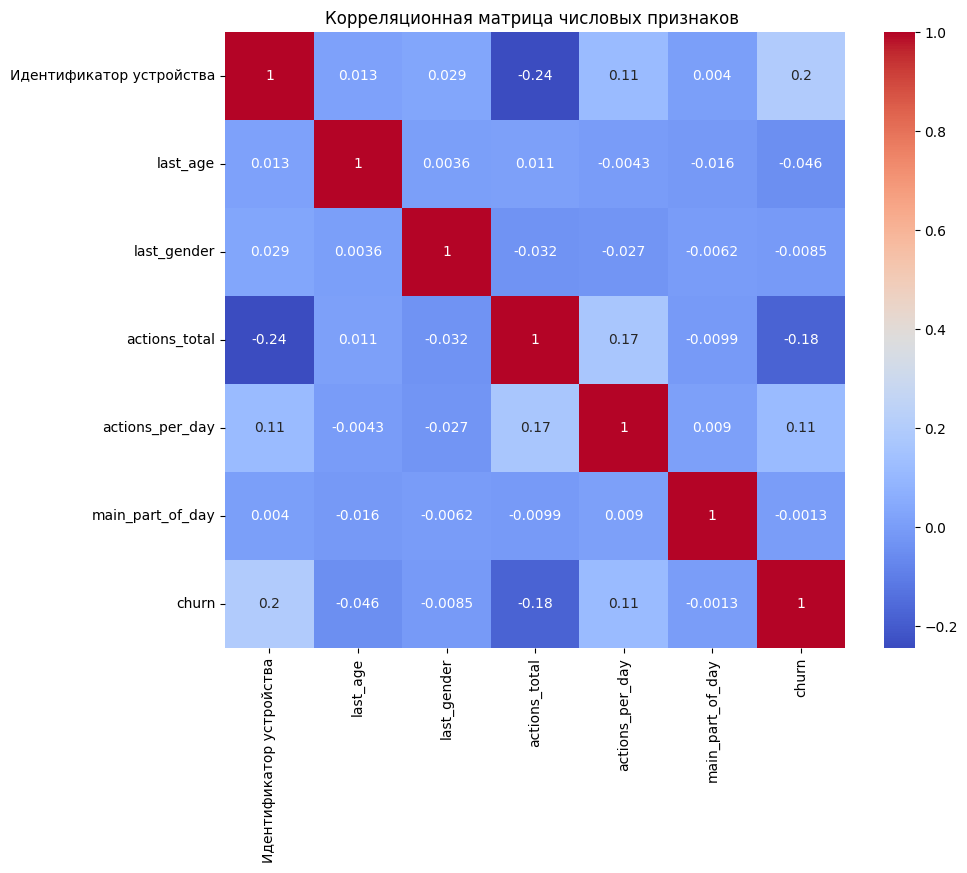

In [124]:
# Выбор только числовых признаков и удаление столбца PassengerId
numeric_cols = final_df.select_dtypes(include=['int64', 'float64'])

# Корреляционная матрица для числовых признаков
corr_matrix = numeric_cols.corr()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков ')
plt.show()

In [125]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

from catboost import CatBoostClassifier

target_col = 'churn'
id_col = 'Идентификатор устройства'
cat_features = ['last_manufacturer', 'main_part_of_day']

X = final_df.drop(columns=[target_col, id_col])
y = final_df[target_col]


X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

base_model = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=0,
    cat_features=cat_features
)

param_dist = {
    'iterations': [300, 500, 800],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0, 0.5, 1, 2, 5]
}

search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

search.fit(
    X_train,
    y_train)


best_model = search.best_estimator_

print("Best params:")
print(search.best_params_)


y_val_pred = best_model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_val_pred)

print(f'ROC-AUC (CatBoost tuned): {auc:.4f}')


fi = best_model.get_feature_importance(prettified=True)
print(fi)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params:
{'learning_rate': 0.03, 'l2_leaf_reg': 3, 'iterations': 800, 'depth': 4, 'bagging_temperature': 2}
ROC-AUC (CatBoost tuned): 0.7595
          Feature Id  Importances
0      actions_total    50.256482
1    actions_per_day    48.255065
2  last_manufacturer     0.570470
3           last_age     0.505820
4   main_part_of_day     0.305294
5        last_gender     0.106868


In [ ]:
%pip install lightgbm

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

from lightgbm import LGBMClassifier


target_col = 'churn'
id_col = 'Идентификатор устройства'
cat_features = ['last_manufacturer', 'main_part_of_day']

X = final_df.drop(columns=[target_col, id_col])
y = final_df[target_col]


X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

for col in cat_features:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')


base_model = LGBMClassifier(
    objective='binary',
    metric='auc',
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)


param_dist = {
    'n_estimators': [300, 500, 800, 1200],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'num_leaves': [15, 31, 63, 127],
    'max_depth': [-1, 5, 8, 12],
    'min_child_samples': [20, 50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.5, 1.0, 2.0]
}


search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=40,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

search.fit(
    X_train,
    y_train,
    categorical_feature=cat_features
)


best_model = search.best_estimator_

print("Best params:")
print(search.best_params_)


y_val_pred = best_model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_val_pred)

print(f'ROC-AUC (LightGBM tuned): {auc:.4f}')


fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print(fi)


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best params:
{'subsample': 1.0, 'reg_lambda': 2.0, 'reg_alpha': 0, 'num_leaves': 31, 'n_estimators': 800, 'min_child_samples': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
ROC-AUC (LightGBM tuned): 0.7599
             feature  importance
4    actions_per_day        8600
2      actions_total        6199
3  last_manufacturer        2042
0           last_age        1494
5   main_part_of_day         790
1        last_gender         568


In [ ]:
%pip install xgboost

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier

target_col = 'churn'
id_col = 'Идентификатор устройства'

cat_features = ['last_manufacturer', 'main_part_of_day']
num_features = [
    'last_age',
    'last_gender',
    'actions_total',
    'actions_per_day'
]

X = final_df.drop(columns=[target_col, id_col])
y = final_df[target_col]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_features),
        ('num', 'passthrough', num_features)
    ]
)

xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

param_dist = {
    'model__n_estimators': [300, 500, 800],
    'model__max_depth': [3, 5, 7, 9],
    'model__learning_rate': [0.01, 0.03, 0.05, 0.1],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__reg_alpha': [0, 0.1, 0.5, 1],
    'model__reg_lambda': [0, 0.5, 1, 2]
}

search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

search.fit(X_train, y_train)

best_model = search.best_estimator_

print("Best params:")
print(search.best_params_)

y_val_pred = best_model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_val_pred)
print(f'ROC-AUC (XGBoost tuned): {auc:.4f}')

feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
coef_df = pd.DataFrame({
    'feature': feature_names,
    'importance': best_model.named_steps['model'].feature_importances_
}).sort_values('importance', ascending=False)

print(coef_df)


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 5.6 MB/s eta 0:00:13
   -- ------------------------------------- 5.2/72.0 MB 19.9 MB/s eta 0:00:04
   ----- ---------------------------------- 9.4/72.0 MB 17.8 MB/s eta 0:00:04
   ------ --------------------------------- 11.5/72.0 MB 16.0 MB/s eta 0:00:04
   ------- -------------------------------- 13.4/72.0 MB 15.3 MB/s eta 0:00:04
   -------- ------------------------------- 14.7/72.0 MB 13.2 MB/s eta 0:00:05
   -------- ------------------------------- 15.7/72.0 MB 12.2 MB/s eta 0:00:05
   --------- ------------------------------ 17.6/72.0 MB 11.3 MB/s eta 0:00:05
   ---------- ----------------------------- 18.9/72.0 MB 11.0 MB/s eta 0:00:05
   ----------- ---------------------------- 20.7/72.0 MB 10.6 MB/s eta 0:00:05
   ------------ --------------------------- 21.8/72.0 MB 10.0 MB/s eta 0:00:06
   ------------ --------------------------- 22.5/72.0 MB 9.6 MB/s

e:\MIPT\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:24:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params:
{'model__subsample': 0.8, 'model__reg_lambda': 1, 'model__reg_alpha': 0.5, 'model__n_estimators': 800, 'model__max_depth': 3, 'model__learning_rate': 0.03, 'model__colsample_bytree': 1.0}
ROC-AUC (XGBoost tuned): 0.7601
                           feature  importance
12            num__actions_per_day    0.448107
11              num__actions_total    0.335700
9                    num__last_age    0.040992
6          cat__main_part_of_day_2    0.030706
0    cat__last_manufacturer_Huawei    0.022128
7          cat__main_part_of_day_3    0.019332
3   cat__last_manufacturer_Samsung    0.018016
10                num__last_gender    0.016356
5    cat__last_manufacturer_Другие    0.014875
4    cat__last_manufacturer_Xiaomi    0.014700
1      cat__last_manufacturer_POCO    0.014179
8          cat__main_part_of_day_4    0.013280
2     cat__last_manufacturer_Redmi    0.011630


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier

target_col = 'churn'
id_col = 'Идентификатор устройства'

cat_features = ['last_manufacturer', 'main_part_of_day']
num_features = [
    'last_age',
    'last_gender',
    'actions_total',
    'actions_per_day'
]

X = final_df.drop(columns=[target_col, id_col])
y = final_df[target_col]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_features),
        ('num', 'passthrough', num_features)
    ]
)

rf_model = RandomForestClassifier(
    n_jobs=-1,
    random_state=42
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])


param_dist = {
    'model__n_estimators': [100, 300, 500, 800],
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 5],
    'model__max_features': ['sqrt', 'log2', 0.6, 0.8, 1.0]
}


search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

search.fit(X_train, y_train)


best_model = search.best_estimator_
print("Best params:")
print(search.best_params_)


y_val_pred = best_model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_val_pred)
print(f'ROC-AUC (RandomForest tuned): {auc:.4f}')

feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
fi = pd.DataFrame({
    'feature': feature_names,
    'importance': best_model.named_steps['model'].feature_importances_
}).sort_values('importance', ascending=False)

print(fi)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


e:\MIPT\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params:
{'model__n_estimators': 300, 'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_features': 0.6, 'model__max_depth': 10}
ROC-AUC (RandomForest tuned): 0.7591
                           feature  importance
12            num__actions_per_day    0.585355
11              num__actions_total    0.347328
9                    num__last_age    0.020158
10                num__last_gender    0.006873
3   cat__last_manufacturer_Samsung    0.005617
6          cat__main_part_of_day_2    0.005614
7          cat__main_part_of_day_3    0.005487
5    cat__last_manufacturer_Другие    0.004754
0    cat__last_manufacturer_Huawei    0.004599
4    cat__last_manufacturer_Xiaomi    0.004092
2     cat__last_manufacturer_Redmi    0.003673
8          cat__main_part_of_day_4    0.003266
1      cat__last_manufacturer_POCO    0.003184


In [32]:
import time
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

TARGET = 'churn'
ID_COL = 'Идентификатор устройства'

X = final_df.drop(columns=[TARGET, ID_COL])
y = final_df[TARGET]

cat_features = ['last_manufacturer']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [33]:
def evaluate_model(model, X_train, X_test, y_train, y_test, is_catboost=False):
    start_time = time.time()
    
    if is_catboost:
        model.fit(X_train, y_train, cat_features=cat_features, verbose=False)
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]
    
    train_time = time.time() - start_time
    
    y_pred = (y_proba >= 0.5).astype(int)
    
    return {
        'ROC_AUC': roc_auc_score(y_test, y_proba),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'Train_time_sec': train_time
    }


In [38]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    learning_rate=0.03,
    l2_leaf_reg=3,
    iterations=800,
    depth=4,
    bagging_temperature=2,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42
)

cat_metrics = evaluate_model(
    cat_model,
    X_train, X_test,
    y_train, y_test,
    is_catboost=True
)

cat_metrics


{'ROC_AUC': 0.7593963365001947,
 'Accuracy': 0.7008435852372583,
 'Precision': 0.5253654342218401,
 'Recall': 0.2794100834571853,
 'F1': 0.3648033435330995,
 'Train_time_sec': 34.7556529045105}

In [39]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(
    subsample=1.0,
    reg_lambda=2.0,
    reg_alpha=0,
    num_leaves=31,
    n_estimators=800,
    min_child_samples=100,
    max_depth=5,
    learning_rate=0.01,
    colsample_bytree=1.0,
    random_state=42
)

# one-hot для категорий
X_train_lgb = pd.get_dummies(X_train, drop_first=True)
X_test_lgb = pd.get_dummies(X_test, drop_first=True)

X_train_lgb, X_test_lgb = X_train_lgb.align(X_test_lgb, axis=1, fill_value=0)

lgb_metrics = evaluate_model(
    lgb_model,
    X_train_lgb, X_test_lgb,
    y_train, y_test
)

lgb_metrics

[LightGBM] [Info] Number of positive: 34986, number of negative: 78811
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 535
[LightGBM] [Info] Number of data points in the train set: 113797, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307442 -> initscore=-0.812105
[LightGBM] [Info] Start training from score -0.812105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

{'ROC_AUC': 0.7596246236722799,
 'Accuracy': 0.6986994727592267,
 'Precision': 0.5222816399286988,
 'Recall': 0.2344803932776952,
 'F1': 0.32365472621114094,
 'Train_time_sec': 1.4279985427856445}

In [40]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    subsample=0.8,
    reg_lambda=1,
    reg_alpha=0.5,
    n_estimators=800,
    max_depth=3,
    learning_rate=0.03,
    colsample_bytree=1.0,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42
)

xgb_metrics = evaluate_model(
    xgb_model,
    X_train_lgb, X_test_lgb,
    y_train, y_test
)

xgb_metrics

{'ROC_AUC': 0.7600683456752461,
 'Accuracy': 0.7010896309314587,
 'Precision': 0.5277714285714286,
 'Recall': 0.26397622041842916,
 'F1': 0.35192805974698976,
 'Train_time_sec': 2.0035927295684814}

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=0.6,
    max_depth=10,
    n_jobs=-1,
    random_state=42
)

rf_metrics = evaluate_model(
    rf_model,
    X_train_lgb, X_test_lgb,
    y_train, y_test
)

rf_metrics

{'ROC_AUC': 0.7589920737958106,
 'Accuracy': 0.6991915641476274,
 'Precision': 0.5244249159989661,
 'Recall': 0.23196524522693496,
 'F1': 0.3216550412175016,
 'Train_time_sec': 5.291254281997681}